In [1]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:54:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.04599659284497445
Precision: 0.0423022431051919
Recall: 0.04599659284497445
F1 Score: 0.04251078984720079

Classification Report:
                        precision    recall  f1-score   support

                  Acne       0.06      0.10      0.07        31
     Allergic Rhinitis       0.00      0.00      0.00        32
        Athlete's Foot       0.05      0.07      0.06        27
          Chapped Lips       0.04      0.04      0.04        26
           Common Cold       0.07      0.06      0.07        33
          Constipation       0.07      0.13      0.10        23
              Dandruff       0.03      0.03      0.03        30
              Dry Skin       0.07      0.07      0.07        30
              Headache       0.00      0.00      0.00        24
             Heartburn       0.03      0.04      0.03        26
                 Hives       0.00      0.00      0.00        23
           Indigestion       0.04      0.05      0.04        20
          Mild Anxiety   

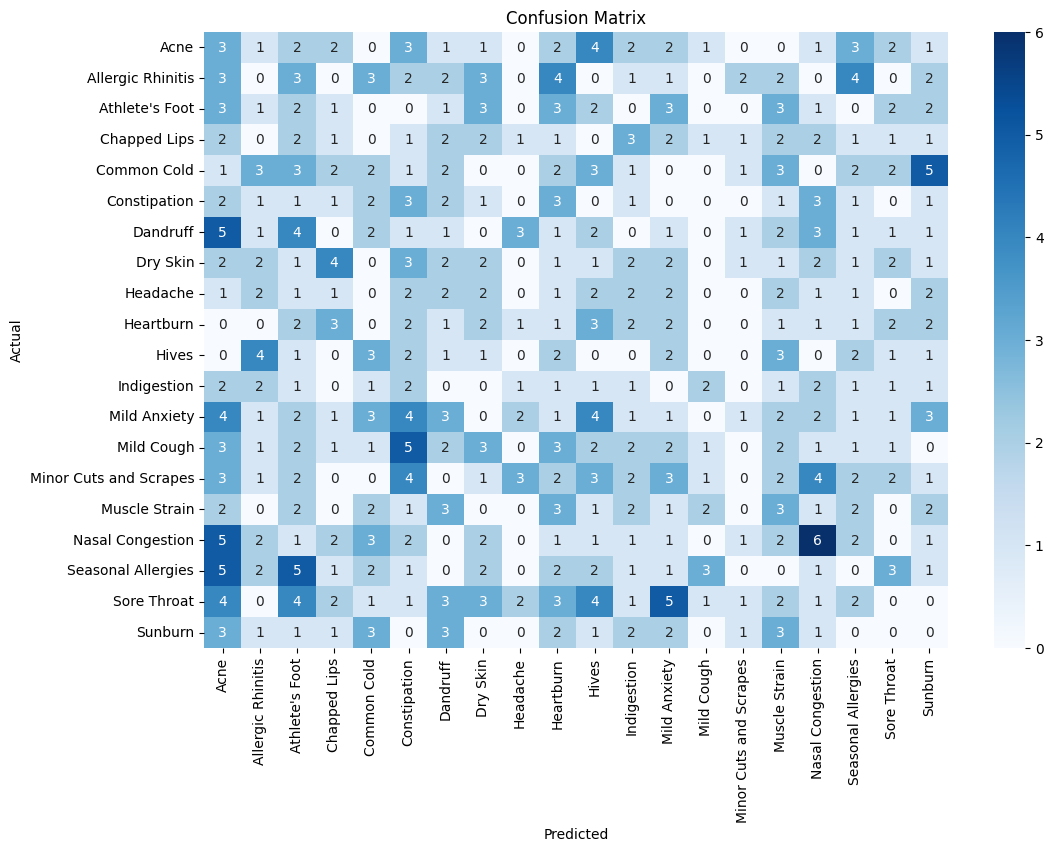

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = '/content/drive/MyDrive/Chatbot/LargeCommonNonDeadlyDiseases.csv'
data = pd.read_csv(dataset_path)

# Remove duplicate entries
data = data.drop_duplicates()

# Ensure Symptoms column is string type and handle missing values
data['Symptoms'] = data['Symptoms'].fillna('').astype(str)

# Encode 'Disease' as the target variable
label_encoder_disease = LabelEncoder()
data['Disease'] = label_encoder_disease.fit_transform(data['Disease'])

# Encode 'Severity' and 'Duration' using one-hot encoding
severity_encoded = pd.get_dummies(data['Severity'], prefix='Severity')
duration_encoded = pd.get_dummies(data['Duration'], prefix='Duration')

# Using TF-IDF for symptom representation
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the symptoms into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(data['Symptoms'])

# Combine TF-IDF features with encoded Severity and Duration
X_combined = np.hstack((X_tfidf.toarray(), severity_encoded.values, duration_encoded.values))

# Define features (X) and target (y)
X = X_combined
y = data['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_disease.classes_))

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_disease.classes_, yticklabels=label_encoder_disease.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
